## ML - Do it yourself
In this notebook we will get a feel for data generation and a few models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Gaussian distribution
- Use np.random.randn to sample 1000 numbers independently from the N(0,1) distribution. This means a random normal (or gaussian) variable with mean 0 and standard deviation 1.

In [ ]:
x = # your code here

### Convert to pandas dataframe

In [ ]:
df = # your code here

In [28]:
df = pd.DataFrame(x)

In [3]:
x = np.random.randn(1000,1)

### Histogram
- Use np.histogram to compute histogram for x using bins [-3,-2] , [-2,1], ... , [2,3].
- Use df.hist for the same reason (bonus = plot).
- Use plt.hist to plot histogram of x.

In [ ]:
# your code here

### Multivariate gaussian
- Use np.random.randn to sample 1000 two-dimensional vectors independently from the N(0,1) distribution.
- Mean value should be (0,0), and the two components of the vector should be independent. Also each sample should be independent.

(The second requirement is true by default)


In [ ]:
twoD = # your code here

### Scatterplot
- Split twoD into two arrays representing the two dimensions.
- Use plt.scatter to draw the scatter plot.

In [31]:
x = # your code here
y = # your code here

# your code here

SyntaxError: invalid syntax (<ipython-input-31-6c7535dee8c5>, line 1)

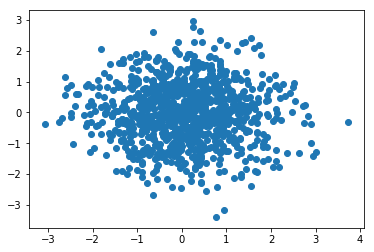

In [85]:
twoD = np.random.randn(1000,2)
x = twoD[:,0]
y = twoD[:,1]
plt.scatter(x,y)

### Scale and translate
- Transform twoD by scaling both axes by 2.
- Transform twoD by adding 5 to x and subtracting 5 from y.
- Compute mean (along axis 0) and standard deviation as a sanity check. Means should be close to [1,-1] and standard deviations should be close to [2,2].
- Draw the scatter plot again.

In [33]:
twoD # your code here
twoD[# fill in ] += 10
twoD[# fill in ] -= 10

In [86]:
twoD *= 2
twoD[:,0] += 5
twoD[:,1] -= 5

### Append more rows
- Sample another 1000 samples of 2D gaussian distribution, again N(0,1) independent entries.
- Create a concatenated 2D array with twoD followed by the additional samples. For this use np.vstack.

In [ ]:
X = # your code here

In [87]:
twoD2 = np.random.randn(1000,2)
X = np.vstack([twoD, twoD2])
X.shape

(2000, 2)

In [81]:
assert X.shape == (2000,2)

### Adding labels
- Make a numpy array with shape (2000,1): 1000 ones followed by 1000 zeros. For this use np.ones , np.zeros and np.vstack. Note that np.ones and np.zeros will need a tuple or similar as argument.
- Stack this to the right of X to obtain a (2000,3) shaped array.

In [ ]:
Y = # your code here
data = # your code here

In [88]:
Y = np.vstack([np.ones((1000,1)),np.zeros((1000,1))])
data = np.hstack([X, Y])

In [83]:
assert Y.shape == (2000,1)
assert Y.sum() == 1000.0
assert Y[0] == 1
assert data.shape == (2000,3)
assert data[:,2].sum() == 1000.0

### Scatter plot
- The first 1000 rows with gray. Color is set by the named argument c.
- The remaining rows with pink.

In [ ]:
# your code here

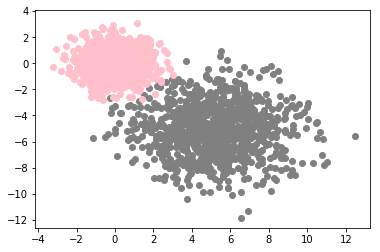

In [89]:
plt.scatter(twoD[:,0], twoD[:,1], c='gray')
plt.scatter(twoD2[:,0], twoD2[:,1], c='pink')


### Shuffle the rows
- Use np.random.permutation to create a random index to shuffle the rows with.
- Use indexing to create a shuffled version of the data.
- Do the same using np.random.shuffle.

In [ ]:
perm = # your code here
data = # your code here
data = # your code here

In [90]:
perm = np.random.permutation(2000)
data = data[perm]

In [91]:
assert data[:,2].sum() == 1000.0